#EDA Case Study

In [2]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

##Importing and getting basic idea of data
Given dataset is related to Video Games sales data

In [3]:
data=pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

##Checking for null and duplicate values and treating them if present

In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
data.isnull().sum().sum()

329

Null values are present in 2 columns. They can be replaced with mean but instead we can drop them directly as very few are null compared to total data (329 of 16598)

In [8]:
data=data.dropna()
#or data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
data.duplicated().sum()

0

##EDA for specific column

###Working on Platform column
Q1. How many unique platforms are present in  the data?

In [11]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
data['Platform'].nunique()

31

Total unique platforms = 31

Q2. Which platform had the latest and the earliest release. What were the sales of the games respectively in the various parts of world?

In [13]:
latest=data['Year'].max()
latest

2020.0

In [14]:
earliest=data['Year'].min()
earliest

1980.0

In [15]:
newest=data[data['Year']==latest]
oldest=data[data['Year']==earliest]
countries=['North America','Europe','Japan','Other countries']

In [16]:
newest

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [17]:
latest_sales=[newest['NA_Sales'].sum(),newest['EU_Sales'].sum(),newest['JP_Sales'].sum(),newest['Other_Sales'].sum()]
latest_sales

[0.27, 0.0, 0.0, 0.02]

<Axes: >

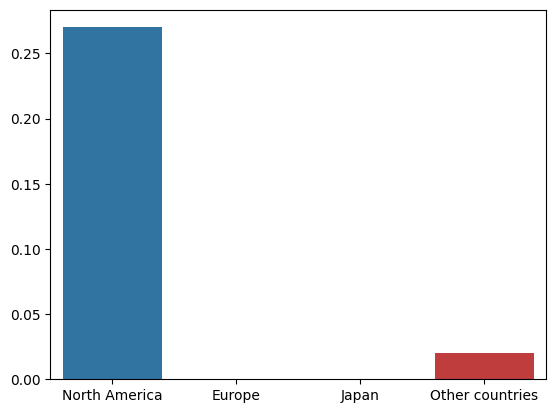

In [18]:
sns.barplot(x=countries,y=latest_sales)

DS is the platform with latest release and its total sale for that year was $0.29 M. North America has the highest sale in most recent year

In [19]:
oldest

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4025,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
6317,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24


In [20]:
earliest_sales=[oldest['NA_Sales'].sum(),oldest['EU_Sales'].sum(),oldest['JP_Sales'].sum(),oldest['Other_Sales'].sum()]
earliest_sales

[10.590000000000002, 0.67, 0.0, 0.12000000000000001]

<Axes: >

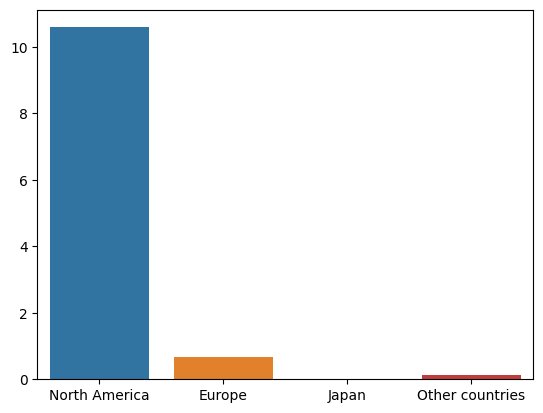

In [21]:
sns.barplot(x=countries,y=earliest_sales)

 2600 is the platform with latest release. North America had the highest sale in the first year when video games were released

Q3. What was the most frequent platform and how did it perform during the years in global sales and individual sales?

In [22]:
data['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Platform having highest number of game releases is DS

In [23]:
DS_data=data[data['Platform']=='DS']
DS_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
...,...,...,...,...,...,...,...,...,...,...,...
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01
16587,16590,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01


In [24]:
DS_data['Year'].unique()

array([2006., 2005., 2010., 2009., 2004., 2007., 2012., 2008., 2011.,
       2013., 2020., 2014., 1985.])

In [25]:
DS_sales=DS_data.groupby(by='Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
DS_sales

<ipython-input-25-333e1c21c655>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DS_sales=DS_data.groupby(by='Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1985.0,0.00,0.00,0.02,0.00,0.02
2004.0,8.42,3.97,3.65,1.37,17.46
2005.0,48.47,42.06,29.86,10.91,131.40
2006.0,50.63,23.53,38.56,8.28,121.15
2007.0,76.36,34.58,26.81,11.27,149.36
2008.0,79.40,33.05,24.01,11.16,147.89
2009.0,62.41,26.52,24.21,8.73,121.99
2010.0,42.36,20.07,19.86,5.73,87.98
2011.0,15.29,6.18,4.32,2.02,27.80


<Axes: xlabel='Year', ylabel='NA_Sales'>

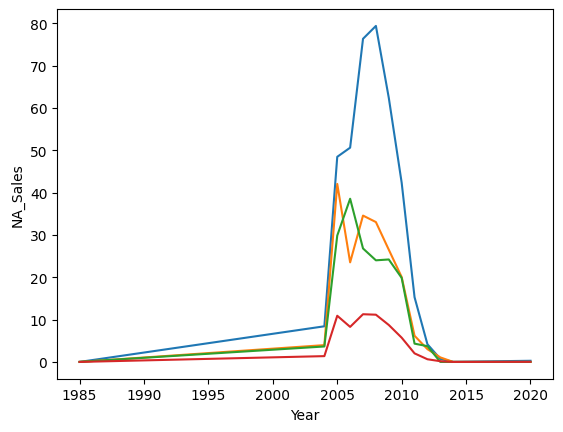

In [26]:
sns.lineplot(data=DS_sales,x=DS_sales.index,y='NA_Sales')
sns.lineplot(data=DS_sales,x=DS_sales.index,y='EU_Sales')
sns.lineplot(data=DS_sales,x=DS_sales.index,y='JP_Sales')
sns.lineplot(data=DS_sales,x=DS_sales.index,y='Other_Sales')

The sales of North America surpassed other countries. Maximum sales were between 2005 to 2010

<Axes: xlabel='Year', ylabel='Global_Sales'>

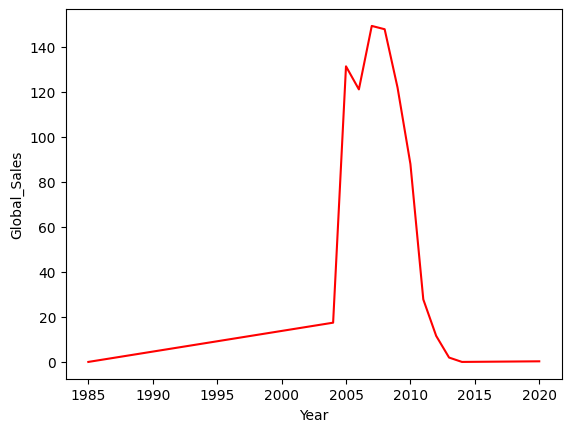

In [27]:
sns.lineplot(data=DS_sales,x=DS_sales.index,y='Global_Sales',color='red')

###Working on Genre column
Q1. How many unique genres are present in  the data?

In [28]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [29]:
data['Genre'].nunique()

12

Total unique genres = 12

Q2. Find out the most and least released Genres

In [30]:
data['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

Action genre has highest releases(3251) while Puzzle has the least released(570) games

In [31]:
action=data[data['Genre']=='Action']
action

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007.0,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01


In [50]:
puzzle=data[data['Genre']=='Puzzle']
puzzle

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
155,156,Tetris,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58
170,171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34
...,...,...,...,...,...,...,...,...,...,...,...
16547,16550,Bookworm Deluxe,PC,2006.0,Puzzle,PopCap Games,0.01,0.00,0.00,0.00,0.01
16568,16571,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01


Q3. What was the most frequent genre and how did it perform during the years in global sales and individual sales?

In [32]:
action_report=action.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
action_report

<ipython-input-32-4f6fb53c4216>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  action_report=action.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,0.32,0.02,0.00,0.00,0.34
1981.0,13.86,0.81,0.00,0.12,14.84
1982.0,6.07,0.38,0.00,0.05,6.52
1983.0,2.67,0.17,0.00,0.02,2.86
1984.0,0.80,0.19,0.83,0.03,1.85
1985.0,1.64,0.38,1.44,0.06,3.52
1986.0,6.52,1.66,5.31,0.25,13.74
1987.0,1.04,0.06,0.00,0.01,1.12
1988.0,1.15,0.16,0.42,0.01,1.75


In [51]:
puzzle_report=puzzle.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
puzzle_report

<ipython-input-51-5a1936497cea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  puzzle_report=puzzle.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1981.0,2.09,0.13,0.00,0.03,2.24
1982.0,9.35,0.58,0.00,0.11,10.03
1983.0,0.72,0.05,0.00,0.01,0.78
1984.0,0.69,0.18,2.23,0.04,3.14
1985.0,1.33,0.19,1.66,0.03,3.21
1988.0,2.97,0.69,1.81,0.11,5.58
1989.0,26.54,3.61,6.77,0.83,37.75
1990.0,3.13,0.80,1.93,0.13,6.00
1991.0,0.86,0.16,2.11,0.11,3.24


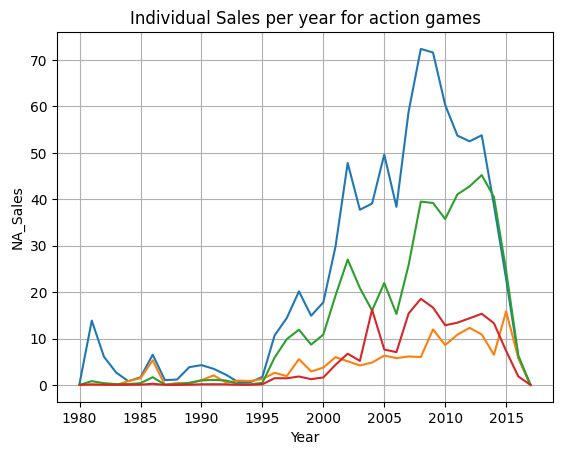

In [33]:
sns.lineplot(data=action_report,x=action_report.index,y='NA_Sales')
sns.lineplot(data=action_report,x=action_report.index,y='JP_Sales')
sns.lineplot(data=action_report,x=action_report.index,y='EU_Sales')
sns.lineplot(data=action_report,x=action_report.index,y='Other_Sales')
plt.title('Individual Sales per year for action games')
plt.grid(True)
plt.show()

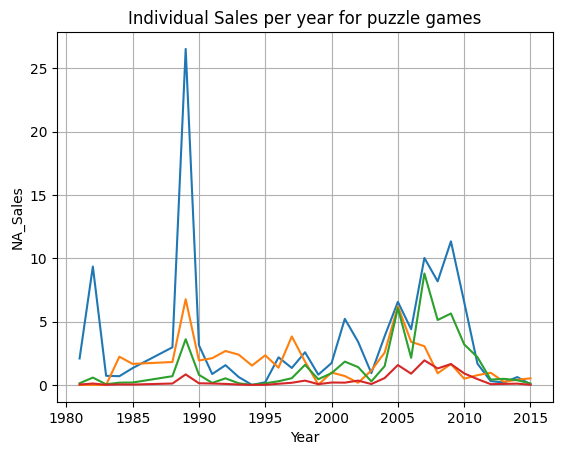

In [52]:
sns.lineplot(data=puzzle_report,x=puzzle_report.index,y='NA_Sales')
sns.lineplot(data=puzzle_report,x=puzzle_report.index,y='JP_Sales')
sns.lineplot(data=puzzle_report,x=puzzle_report.index,y='EU_Sales')
sns.lineplot(data=puzzle_report,x=puzzle_report.index,y='Other_Sales')
plt.title('Individual Sales per year for puzzle games')
plt.grid(True)
plt.show()

<Axes: xlabel='Year', ylabel='Global_Sales'>

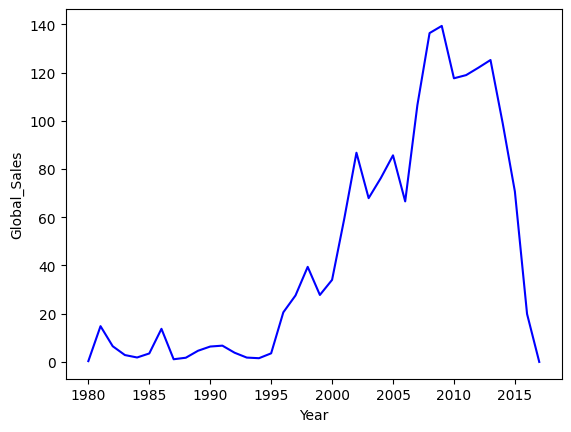

In [34]:
sns.lineplot(data=action_report,x=action_report.index,y='Global_Sales',color='blue')

<Axes: xlabel='Year', ylabel='Global_Sales'>

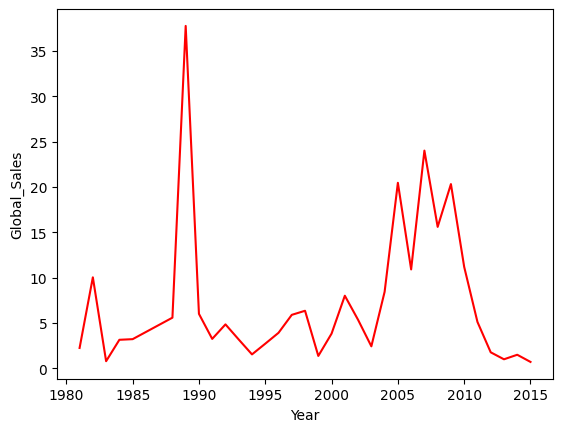

In [53]:
sns.lineplot(data=puzzle_report,x=puzzle_report.index,y='Global_Sales',color='red')

In [35]:
action_report['Global_Sales'].max()     #gives maximum value of specified column
action_report['Global_Sales'].idxmax()  #idxmax gives index of maximum value of specified column

2009.0

In [54]:
puzzle_report['Global_Sales'].idxmax()

1989.0

###Working on Publisher column
Q1. How many unique publishers are present in the data?

In [36]:
data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [37]:
data['Publisher'].nunique()

576

Total unique publishers = 12

Q2. Find out the most and least publishers

In [38]:
data['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

Electronic Arts has the most number of publishers and there are multiple publishers like Pow,MediaQuest,UIG entertainment,etc which have least publishers

In [39]:
EA=data[data['Publisher']=='Electronic Arts']
EA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


Q3. What was the most frequent publisher and how did it perform during the years in global sales and individual sales?

In [40]:
EA_report=action.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
EA_report

<ipython-input-40-150489d1ddf5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EA_report=action.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,0.32,0.02,0.00,0.00,0.34
1981.0,13.86,0.81,0.00,0.12,14.84
1982.0,6.07,0.38,0.00,0.05,6.52
1983.0,2.67,0.17,0.00,0.02,2.86
1984.0,0.80,0.19,0.83,0.03,1.85
1985.0,1.64,0.38,1.44,0.06,3.52
1986.0,6.52,1.66,5.31,0.25,13.74
1987.0,1.04,0.06,0.00,0.01,1.12
1988.0,1.15,0.16,0.42,0.01,1.75


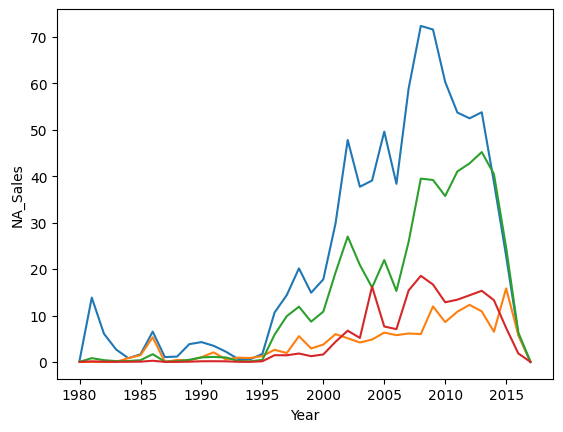

In [41]:
sns.lineplot(data=EA_report,x=EA_report.index,y='NA_Sales')
sns.lineplot(data=EA_report,x=EA_report.index,y='JP_Sales')
sns.lineplot(data=EA_report,x=EA_report.index,y='EU_Sales')
sns.lineplot(data=EA_report,x=EA_report.index,y='Other_Sales')
plt.show()

<Axes: xlabel='Year', ylabel='Global_Sales'>

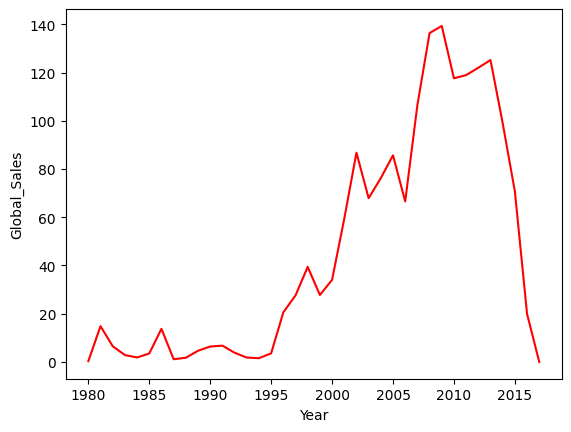

In [42]:
sns.lineplot(data=EA_report,x=EA_report.index,y='Global_Sales',color='red')

##EDA additional questions
Q. In which year the global as well as individual sales of video games are the least

In [43]:
df=data.groupby(by='Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,33.73,4.74,14.56,0.92,53.94
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


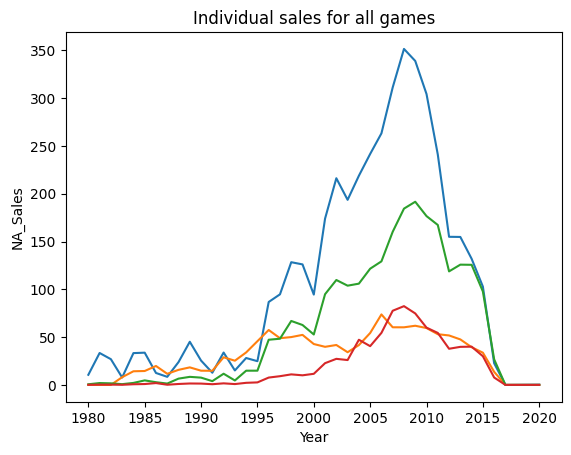

In [44]:
sns.lineplot(data=df,x=df.index,y='NA_Sales')
sns.lineplot(data=df,x=df.index,y='JP_Sales')
sns.lineplot(data=df,x=df.index,y='EU_Sales')
sns.lineplot(data=df,x=df.index,y='Other_Sales')
plt.title('Individual sales for all games')
plt.show()

In [45]:
#Maximum sales
print('In North America the maximum sales of video games was in year:',df['NA_Sales'].idxmax())
print('In Europe the maximum sales of video games was in year:',df['EU_Sales'].idxmax())
print('In Japan the maximum sales of video games was in year:',df['JP_Sales'].idxmax())
print('In Other countries the maximum sales of video games was in year:',df['Other_Sales'].idxmax())

In North America the maximum sales of video games was in year: 2008.0
In Europe the maximum sales of video games was in year: 2009.0
In Japan the maximum sales of video games was in year: 2006.0
In Other countries the maximum sales of video games was in year: 2008.0


<Axes: xlabel='Year', ylabel='Global_Sales'>

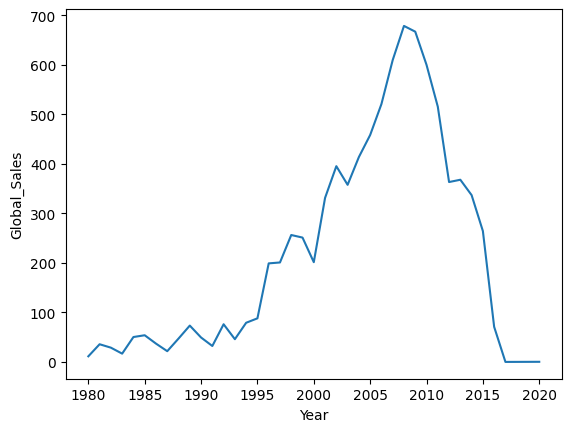

In [46]:
sns.lineplot(data=df,x=df.index,y='Global_Sales')

In [47]:
print('Globally the maximum sales of video games was in year:',df['Global_Sales'].idxmax())

Globally the maximum sales of video games was in year: 2008.0


In [48]:
#Minimum sales
print('In North America the minimum sales of video games was in year:',df['NA_Sales'].idxmin())
print('In Europe the minimum sales of video games was in year:',df['EU_Sales'].idxmin())
print('In Japan the minimum sales of video games was in year:',df['JP_Sales'].idxmin())
print('In Other countries the minimum sales of video games was in year:',df['Other_Sales'].idxmin())

In North America the minimum sales of video games was in year: 2017.0
In Europe the minimum sales of video games was in year: 2017.0
In Japan the minimum sales of video games was in year: 1980.0
In Other countries the minimum sales of video games was in year: 2017.0


In [49]:
print('Globally the minimum sales of video games was in year:',df['Global_Sales'].idxmin())

Globally the minimum sales of video games was in year: 2017.0
